# NSF Research Awards Abstracts
This dataset comprises several paper abstracts, one per file, that were furnished by the NSF
(National Science Foundation). 
The task is developing an unsupervised model which classifies abstracts into a topic (discover
them). The goal is to group abstracts based on their semantic similarity.

## SOLUTION - How to Cluster Documents
We can think of the process of clustering documents in three steps:

1. Cleaning and tokenizing data: this usually involves lowercasing text, removing non-alphanumeric characters, or stemming words.
2. Generating vector representations of the documents: this concerns the mapping of documents from words into numerical vectors—some common ways of doing this include using bag-of-words models or word embeddings.
3. Applying a clustering algorithm on the document vectors: this requires selecting and applying a clustering algorithm to find the best possible groups using the document vectors. Some frequently used algorithms include K-means or Hierarchical Clustering.

## Notes about this work
- In the first version of this model we are going to check the steps of NLP
using Doc2vec and functions from gensim library
- I will use all the words in the documents read from XML files and in this version of experimentation
- I don´t remove stopwords or another kind of cleaning like reducing short words or dimensionality
because we need to make all the steps to implement clustering algorithm and review results at first check 
the results, to make the formation of clusters and similarity with the original data.
- In later versions we can include another techniques and optimize the volume of words with the goal
of getting better results and clustering of the documents in categories (not existent now) and this
we call it like pseudo-categories (with the more representative words in a cluster)
### I would make functions and pipelines of this code but my time wasn't enough to spend in better coding and testing another techniques for comparison

## Install libraries and prepare definitions

In [ ]:
import os
import sys
from xml.dom.minidom import parse
import pandas as pd
import seaborn as sns
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn import metrics
from sklearn.cluster import Birch
from sklearn.cluster import KMeans

## Loading data from several XML files from the directory

In [194]:
direct = "C:\\Users\\Jjog22\\Downloads\\2020\\"
data_records = []
count = 0
def select_files_in_folder(dir, ext):
    for file in os.listdir(dir):
        if file.endswith('.%s' % ext):
            yield os.path.join(dir, file)

for file in select_files_in_folder(direct, 'xml'):
    with open (file,"rb") as data:
        reg = {}
        count = count+1
        tree = parse(data)
        lst = tree.getElementsByTagName('AbstractNarration')[0]

        if(tree.getElementsByTagName('AbstractNarration')[0].firstChild):
            reg['name'] = lst.firstChild.data
            data_records.append(reg)
        if count == 200:  # Limit the reading of docs for testing purposes first
            break

In [195]:
# Print one sample for confirming the reading of abstract
print(data_records[0]['name'])

Head and heart development are closely intertwined during embryonic development in vertebrates. They share molecular regulatory mechanism as well as some progenitor cell populations. Both head and heart, are made from a multitude of cells, which include mesodermal cells that form musculature and neural crest cells which form connective tissue. Mesodermal and neural crest cells are also important for the development of cartilages and bones in head and neck and for proper septation of the heart. The identity of cells that constitute these tissues is specified very early during embryogenesis via a specific set of genes (specifiers), then follow their trajectory to become muscle, connective tissue, etc.<br/>One early specifier, gastrulation-brain-homeobox 2 (Gbx2), is essential for the migration (movement) and survival of neural crest cells. Neural crest cells and mesodermal cells interact during their migration to form head and heart structures. While mesodermal cells are not directly eff

## We are going to tokenize the words in every document and also we will get the tags for every one list of document

In [ ]:
tokenizeddoc= []
for d in data_records:
    tokenizeddoc.append(word_tokenize(d['name'] .lower()))

## We are going to make tags from every abstract from the document

In [197]:
tagged = [TaggedDocument(d,[i])  for i,d in enumerate(tokenizeddoc) ]

In [199]:
tagged[0]

TaggedDocument(words=['head', 'and', 'heart', 'development', 'are', 'closely', 'intertwined', 'during', 'embryonic', 'development', 'in', 'vertebrates', '.', 'they', 'share', 'molecular', 'regulatory', 'mechanism', 'as', 'well', 'as', 'some', 'progenitor', 'cell', 'populations', '.', 'both', 'head', 'and', 'heart', ',', 'are', 'made', 'from', 'a', 'multitude', 'of', 'cells', ',', 'which', 'include', 'mesodermal', 'cells', 'that', 'form', 'musculature', 'and', 'neural', 'crest', 'cells', 'which', 'form', 'connective', 'tissue', '.', 'mesodermal', 'and', 'neural', 'crest', 'cells', 'are', 'also', 'important', 'for', 'the', 'development', 'of', 'cartilages', 'and', 'bones', 'in', 'head', 'and', 'neck', 'and', 'for', 'proper', 'septation', 'of', 'the', 'heart', '.', 'the', 'identity', 'of', 'cells', 'that', 'constitute', 'these', 'tissues', 'is', 'specified', 'very', 'early', 'during', 'embryogenesis', 'via', 'a', 'specific', 'set', 'of', 'genes', '(', 'specifiers', ')', ',', 'then', 'foll

## We can use doc2vec with the tokenized vectors of documents
## the result is the model with the 20 most similary semantic words

In [200]:
model = Doc2Vec(tagged,vector_size=20,window=2,min_count=1,workers=4,epochs=100)
model

## Use infer vector to infer the data in tokens separated in the dataset and prepare to be used for clustering algorithm

In [201]:
X=[]
#inference hyper-parameters
start_alpha=0.01
infer_epoch=1000

for d in tokenizeddoc:
    X.append( model.infer_vector(d , alpha=start_alpha, steps=infer_epoch) )

BIRCH (balanced iterative reducing and clustering using hierarchies) is an unsupervised data mining algorithm used to perform hierarchical clustering over particularly large data-sets.With modifications it can also be used to accelerate k-means clustering and Gaussian mixture modeling with the expectation–maximization algorithm. An advantage of BIRCH is its ability to incrementally and dynamically cluster incoming, multi-dimensional metric data points in an attempt to produce the best quality clustering for a given set of resources (memory and time constraints). In most cases, BIRCH only requires a single scan of the database.

## Using Birch clustering method to define a way of clustering of large dataset with multiple variables

In [202]:
k=5 #number of clusters
brc = Birch(branching_factor=50, n_clusters=k, threshold=0.1, compute_labels=True)
brc.fit(X)
 
clusters = brc.predict(X)

In [209]:
print ("Clusters: ")
print (clusters)

Clusters: 
[1 3 0 2 1 0 0 0 1 0 0 1 2 0 0 1 0 1 1 3 2 0 3 0 1 1 0 1 0 1 0 1 1 0 0 1 1
 0 0 0 1 1 1 0 1 1 1 1 0 0 3 0 0 1 1 1 0 3 1 1 1 2 3 0 0 3 0 1 1 0 1 1 0 1
 1 0 1 0 1 3 1 0 0 1 1 1 0 1 1 1 3 2 0 1 2 2 1 0 1 1 1 1 0 3 1 0 0 0 3 1 0
 0 2 0 1 2 1 4 4 2 4 1 2 0 2 1 3 4 1 3 3 3 2 1 3 3 3 1 2 1 1 1 2 2 1 2 4 2
 3 1 0 2 0 2 2 2 3 2 0 0 3 1 3 3 2 3 2 1 1 3 2 3 3 2 2 2 3 3 0 3 3 2 2 2 2
 0 2 2 3 2 3 3 0 2 2 2 2 1 3 2]


## Using another clustering method more easy to understand and define the centers 

In [204]:
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1,  verbose=True)
km.fit(X)

Initialization complete
Iteration 0, inertia 22782.838921177154
Iteration 1, inertia 14239.996073939717
Iteration 2, inertia 13714.598438378785
Iteration 3, inertia 13660.873769759432
Iteration 4, inertia 13644.714994332708
Converged at iteration 4: strict convergence.


KMeans(max_iter=100, n_clusters=5, n_init=1, verbose=True)

In [210]:
clusters = km.predict(X)
print ("Clusters: ")
print (clusters)

Clusters: 
[1 0 4 3 1 4 4 4 1 4 4 3 2 4 4 1 4 1 1 0 3 4 0 4 1 1 4 1 4 1 4 1 1 4 1 4 1
 4 4 4 1 4 1 4 1 1 1 1 4 4 0 4 4 1 1 1 4 0 1 1 1 3 0 4 4 0 4 1 1 4 1 1 4 1
 1 0 1 4 1 0 1 4 4 1 1 1 4 1 1 1 0 1 4 1 3 1 1 4 1 1 1 1 3 0 1 4 4 4 0 1 4
 4 2 4 1 2 4 0 0 2 0 0 3 4 2 0 0 0 1 0 0 0 3 1 0 0 0 1 3 1 0 1 3 3 0 2 0 2
 3 1 4 3 4 3 2 3 0 3 4 4 0 1 0 0 3 0 2 1 0 0 3 0 0 2 2 3 0 0 4 0 3 3 2 2 3
 4 3 2 0 3 0 0 4 3 2 2 3 1 0 2]


## Now printing for every cluster the categories defined from all the solution applied using 10 most representative words of the cluster in a pseudo-category 
(we need to remember that it haven't had stopwords removed in this scope)

In [205]:
print("Most representative terms per cluster (based on centroids):")
for i in range(k):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[km.cluster_centers_[i]], topn=10)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: technicians withdrawal automotive technician react preventing analysts whilst biotechnology shortfall 
Cluster 1: ligand-induced streams cu-induced low-power halo microbe meta-regression whilst alfvenic colonization 
Cluster 2: individual write academies fractions formal bromides normandale interspecies witnessing makerspace-facilitated 
Cluster 3: interspecies bromides normandale diverge semi-annual single- mutant identity iowa perceptions 
Cluster 4: uniformization double summit spaces self-determination operator conformal elliptic yamabe equivariant 


## Now preparing the data for plotting the points of vectors with the clusters found with Kmeans

In [206]:
n_features=20
df_X = pd.DataFrame(X, columns=[f'X{str(i)}' for i in range(n_features)])
df_X['cluster'] = clusters.T
df_X[:10]

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,cluster
0,1.222218,3.421487,2.900913,5.299088,1.244431,-6.549654,-3.733086,4.695994,-0.816876,3.684415,...,1.120073,-3.249060,-1.426443,-4.750561,-0.447951,6.183841,-0.573976,-9.120449,-1.189856,1
1,2.312858,-1.072993,1.201875,4.623098,3.577709,3.172105,1.514272,-0.753903,-0.255479,-1.219908,...,3.671514,-0.884290,-1.018597,3.881118,-0.852452,3.073549,-0.213734,-1.769404,-3.696149,3
2,3.063264,-4.433488,-0.911484,0.391554,6.669806,0.759060,1.433682,1.830176,0.148040,-1.140092,...,2.982672,-5.394191,-3.479293,-1.621508,1.396666,1.055895,-0.885376,-1.945141,-4.833676,0
3,3.997170,-0.384614,1.220065,1.479192,4.549166,-2.942659,1.119800,1.300319,0.025938,-2.194084,...,-0.743585,-0.044775,-3.791886,1.355312,-0.919058,4.710793,-0.166257,-7.857598,-2.714498,2
4,0.122759,2.206995,-0.469515,7.249138,-1.128570,3.141586,-5.887905,2.867234,-3.392575,3.243379,...,1.819172,-1.295064,-2.307408,-5.660666,0.782763,2.624222,0.611877,-2.088635,-3.645327,1
5,-0.731066,-1.492429,-2.123064,1.708949,0.674910,-0.535293,-2.584781,-0.673896,-0.811164,1.548814,...,4.258260,-2.398514,-4.929351,-2.244110,2.609237,-2.446972,-5.333181,-2.563735,-3.274400,0
6,1.396110,-2.870889,-1.839843,2.978153,4.078466,1.405939,-0.788566,1.458503,-0.453515,-1.186350,...,1.090943,-2.578215,-1.667059,-1.363108,2.005216,1.496490,-0.360052,-1.419857,-2.000016,0
7,-2.569897,-2.255440,1.581014,1.434629,1.549800,-0.534726,1.802473,1.096187,-0.291467,2.383085,...,1.036353,-2.831564,-4.635042,-0.883832,5.969926,-0.387438,-4.243505,-4.965846,-2.433245,0
8,0.689613,0.230289,-1.992826,5.386662,0.554627,-0.817295,-3.831934,-2.386198,-2.506855,2.003424,...,0.084422,-1.440749,-2.445580,0.418043,2.198206,0.997979,0.437881,-2.724844,-5.879296,1
9,0.703942,-1.786209,-1.464140,1.862772,4.716974,-0.307364,-0.418943,0.208819,0.659927,0.556120,...,4.195662,-3.373060,-2.652169,-3.034444,2.919453,4.455566,-3.465005,-0.921235,-1.119794,0


# GRAPH THE POINTS OF DATA AND CLUSTER
 After finish the unsupervised model and determine the pseudo-categories we can try to make 
 a representation in a visual way of the points of the vectorized words with the cluster
 as a result of the kmeans prediction

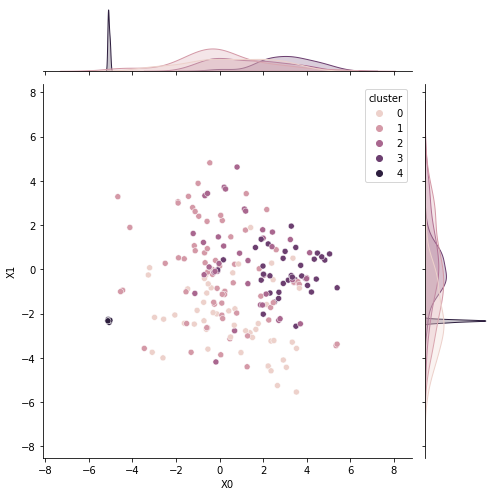

In [207]:
g = sns.jointplot(data=df_X, x='X0', y='X1', hue='cluster', height=7)

# Other Approaches
## There are other approaches you could take to cluster text data like:

- Using a pre-trained word embedding instead of training your own like in this notebook. 
- Generating feature vectors with another libraries like spacy using a bag-of-words or word embeddings.
- Using improvements with the tokenization using lemmatization and stemming.
- Reducing dimensionality of feature vectors. This is very useful if you use a bag-of-words approach.
- Clustering documents using other algorithms like HDBSCAN or Hierarchical Clustering.
- Classifing clusters based on categories applying NLP services like watson nlp
- Using BERT sentence embeddings to generate the feature vectors.